In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np
from keras.models import load_model
from copy import deepcopy
import os

In [ ]:
path_portraits = '/content/drive/My Drive/Licenta/portraits_celeba/'
# path_portraits = ''
path_archives = path_portraits + 'dataset/dataset_arrays_archives/'
# path_archives = 'archives/'
path_mr = path_portraits + 'models+results/'
path_cleancode = path_mr + 'cleancode/'
path_autoencoder = path_cleancode + 'autoencoder/'
path_gan = path_cleancode + 'gan/'

In [ ]:
path_landscapes = '/content/drive/My Drive/Licenta/landscapes/'
# path_landscapes = 'landscapes/'
path_archives = path_landscapes + 'dataset/big_dataset/all/'
# path_archives = 'archives/'
path_mr = path_landscapes + 'models+results/'
# path_cleancode = path_mr + 'cleancode/'
path_autoencoder = path_mr + 'autoencoder/'
path_gan = path_mr + 'gan/'
# print(path_gan)

In [ ]:
def path_models_results_autoenc(model_index):
  path = ''
  if model_index == 3:
    path = 'skip_false_Conv2DTranspose/'
  elif model_index == 4:
    path = 'skip_false_UpSampling2D/'
  elif model_index == 1:
    path = 'skip_true_Conv2DTranspose/'
  elif model_index == 2:
    path = 'skip_true_UpSampling2D/'
  path = path_autoencoder + path
  return path

In [ ]:
def path_models_results_gan(model_index):
  model_index = int(model_index)
  path = ''
  if model_index == 11:
    path = '11_skipTrue_conv2D_basic_-_0.5_20,80/'
  elif model_index == 12:
    path = '12_skipTrue_conv2D_convo_4_0.5_20,80/'
  elif int(model_index // 10) == 13 or model_index == 13:
    path = '13_skipTrue_conv2D_convo_8_0.5_20,80/'
  elif model_index == 21:
    path = '21_skipTrue_upsample2D_basic_-_0.5_20,80/'
  elif model_index == 22:
    path = '22_skipTrue_upsample2D_convo_4_0.5_20,80/'
  elif model_index == 23:
    path = '23_skipTrue_upsample2D_convo_8_0.5_20,80/'
  elif model_index == 31:
    path = '31_skipFalse_conv2D_basic_-_0.5_20,80/'
  elif model_index == 32:
    path = '32_skipFalse_conv2D_convo_4_0.5_20,80/'
  elif model_index == 33:
    path = '33_skipFalse_conv2D_convo_8_0.5_20,80/'
  elif model_index == 41:
    path = '41_skipFalse_upsample2D_basic_-_0.5_20,80/'
  elif model_index == 42:
    path = '42_skipFalse_upsample2D_convo_4_0.5_20,80/'
  elif model_index == 43:
    path = '43_skipFalse_upsample2D_convo_8_0.5_20,80/'
  path = path_gan + path
  return path

In [ ]:
model_index_g = 13
train_number_g = '1'
path_architecture_g = path_models_results_gan(model_index_g)
path_models_g = path_architecture_g + 'models' + train_number_g + '/'
path_model_g = path_models_g + 'gener_ep3.0.h5'
path_results_g = path_architecture_g + 'results' + train_number_g + '/'
# path_history_g = path_architecture_g + 'history' + train_number_g + '/' + 'history.npy'

In [ ]:
model_index_ae = 1
train_number_ae = '1'
path_architecture_ae = path_models_results_autoenc(model_index_ae)
path_models_ae = path_architecture_ae + 'models' + train_number_ae + '/'
path_model_ae = path_models_ae + 'weights.100-0.00.h5'
path_results_ae = path_architecture_ae + 'results' + train_number_ae + '/'
path_history_ae = path_architecture_ae + 'history' + train_number_ae + '/' + 'history.npy'

Plot history

In [ ]:
path_landscapes = '/content/drive/My Drive/Licenta/landscapes/'
# path_landscapes = 'landscapes/'
path_archives = path_landscapes + 'dataset/big_dataset/all/'
# path_archives = 'archives/'
path_mr = path_landscapes + 'models+results/'
# path_cleancode = path_mr + 'cleancode/'
path_autoencoder = path_mr + 'autoencoder/'
path_gan = path_mr + 'gan/'
# print(path_gan)

In [ ]:
history=np.load(path_history_g, allow_pickle='TRUE').item()

In [ ]:
len(history['losses1_discr'])

56321

In [ ]:
print(history['losses1_discr'][-10:])
print(history['losses2_discr'][-10:])
print(history['losses3_gan'][-10:])

[0.30732104, 0.30523235, 0.30680075, 0.30725434, 0.3076028, 0.3062265, 0.30513144, 0.30592674, 0.30689818, 0.30672935]
[0.44007218, 0.44211406, 0.4402315, 0.44088995, 0.4374925, 0.44091296, 0.44163543, 0.43885565, 0.43907315, 0.44109488]
[0.27628765, 0.25347862, 0.22611788, 0.2969817, 0.2583835, 0.3210704, 0.24689028, 0.23803349, 0.25737035, 0.24964613]


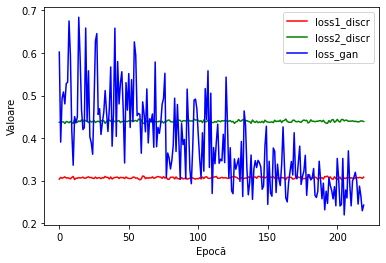

In [ ]:
plt.plot(history['losses1_discr'][0:-1:256], color='red', label='loss1_discr')
plt.plot(history['losses2_discr'][0:-1:256], color='green', label="loss2_discr")
plt.plot(history['losses3_gan'][0:-1:256], color='blue', label="loss_gan")

plt.xlabel('Epocă')
plt.ylabel('Valoare')
plt.legend(loc='best')
plt.savefig(path_portraits + 'gan13.png')
plt.show()

GAN

In [ ]:
model_index = 13
train_number = '2'
path_architecture = path_models_results_gan(model_index)
path_models = path_architecture + 'models' + train_number + '/'
path_model = path_models + 'gener_ep4.h5'
path_results = path_architecture + 'results' + train_number + '_test4_ep25/'

In [ ]:
generator = load_model(path_model_g)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
y_pred = generator.predict(x_test)

In [ ]:
y_pred = y_pred * 255

for i, y in enumerate(y_pred):
    img = Image.fromarray(y.astype(np.uint8))
    img.save(path_results + '{}.jpg'.format(i))

Autoencoder

In [ ]:
model_index = 1
train_number = '3'
path_architecture = path_models_results_autoenc(model_index)
path_models = path_architecture + 'models' + train_number + '/'
path_model = path_models + 'weights.30-0.01.h5'
path_results = path_architecture + 'results' + train_number + '_pretrained_ep30/'

In [ ]:
autoencoder = load_model(path_model)

In [ ]:
y_pred = autoencoder.predict(x_test)

In [ ]:
y_pred = y_pred * 255

for i, y in enumerate(y_pred):
    img = Image.fromarray(y.astype(np.uint8))
    img.save(path_results + '{}.jpg'.format(i))

In [ ]:
path_results

'/content/drive/My Drive/Licenta/landscapes/models+results/autoencoder/skip_true_Conv2DTranspose/results1_ep30/'

Portraits

In [ ]:
path_portraits = '/content/drive/My Drive/Licenta/portraits_celeba/'
path_archives = path_portraits + 'dataset/dataset_arrays_archives/'
path_mr = path_portraits + 'models+results/'
path_cleancode = path_mr + 'cleancode/'
path_autoencoder = path_cleancode + 'autoencoder/'
path_gan = path_cleancode + 'gan/'

In [ ]:
model_index = 23
train_number = '1'
path_architecture = path_models_results_gan(model_index)
path_models = path_architecture + 'models' + train_number + '/'
path_model = path_models + 'gener_ep19.h5'
path_results = path_architecture + 'results' + train_number + '_try/'
path_history = path_architecture + 'history' + train_number + '/' + 'history.npy'

In [ ]:
generator = load_model(path_model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
x_test = np.load(path_archives + 'x_test_2.npz')
x_test = x_test['x_test']/255

In [ ]:
y_pred = generator.predict(x_test)

In [ ]:
y_pred = y_pred * 255

for i, y in enumerate(y_pred):
    img = Image.fromarray(y.astype(np.uint8))
    img.save(path_results + '{}.jpg'.format(i))

Enhance colors

In [ ]:
path_results = path_models_results_gan(13) + 'results1_test7/'
path_image = path_results + '204.jpg'
im = Image.open(path_image)
im.show()
im3 = ImageEnhance.Color(im) 
  
# showing resultant image 
im3.enhance(1.5).save(path_results + '204enhanced.jpg')

In [ ]:
# path_results = path_models_results_autoenc(1) + 'results1_ep30/'
path_image = path_results + '805.jpg'
im = Image.open(path_image)
im.show()
im3 = ImageEnhance.Color(im) 
  
# showing resultant image 
im3.enhance(2.5).save(path_results + '805enhanced.jpg')

In [ ]:
path_results

'/content/drive/My Drive/Licenta/landscapes/models+results/autoencoder/skip_true_Conv2DTranspose/results25/'

Plot losses of AE

In [ ]:
model_index_ae = 1
train_number_ae = '1'
path_architecture_ae = path_models_results_autoenc(model_index_ae)
path_models_ae = path_architecture_ae + 'models' + train_number_ae + '/'
path_model_ae = path_models_ae + 'weights.100-0.00.h5'
path_results_ae = path_architecture_ae + 'results' + train_number_ae + '/'
path_history_ae = path_architecture_ae + 'history' + train_number_ae + '/' + 'history.npy'

In [ ]:
history=np.load(path_history_ae, encoding='bytes', allow_pickle='TRUE').item()

In [ ]:
history[b'lr']

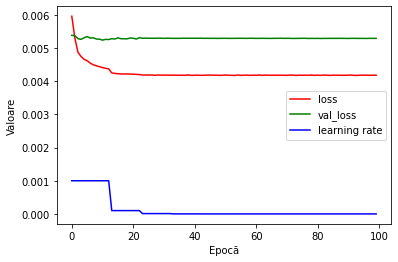

In [ ]:
plt.plot(history[b'loss'], color='red', label='loss')
plt.plot(history[b'val_loss'], color='green', label="val_loss")
plt.plot(history[b'lr'], color='blue', label="learning rate")

plt.xlabel('Epocă')
plt.ylabel('Valoare')
plt.legend(loc='best')
plt.savefig(path_portraits + 'autoenc_skipTrue_conv2D.png')
plt.show()

Plot losses of AE on large set of landscapes

In [ ]:
path_landscapes = '/content/drive/My Drive/Licenta/landscapes/'
# path_landscapes = 'landscapes/'
path_archives = path_landscapes + 'dataset/big_dataset/all/'
# path_archives = 'archives/'
path_mr = path_landscapes + 'models+results/'
# path_cleancode = path_mr + 'cleancode/'
path_autoencoder = path_mr + 'autoencoder/'
path_gan = path_mr + 'gan/'
# print(path_gan)

In [ ]:
model_index_ae = 1
train_number_ae = '1'
path_architecture_ae = path_models_results_autoenc(model_index_ae)
path_models_ae = path_architecture_ae + 'models' + train_number_ae + '/'
path_model_ae = path_models_ae + 'weights.30-0.00.h5'
path_results_ae = path_architecture_ae + 'results' + train_number_ae + 'diff/'
path_history_ae = path_architecture_ae + 'history' + train_number_ae + '/' + 'history.npy'

In [ ]:
history=np.load(path_history_ae, allow_pickle='TRUE').item()

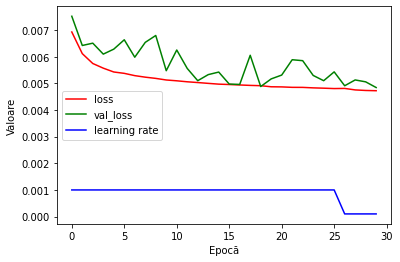

In [ ]:
plt.plot(history['loss'], color='red', label='loss')
plt.plot(history['val_loss'], color='green', label="val_loss")
plt.plot(history['lr'], color='blue', label="learning rate")

plt.xlabel('Epocă')
plt.ylabel('Valoare')
plt.legend(loc='best')
plt.savefig(path_landscapes + 'autoenc_skipTrue_conv2D.png')
plt.show()

Plot losses of AE on small set of landscapes

In [ ]:
model_index_ae = 1
train_number_ae = '2'
path_architecture_ae = path_models_results_autoenc(model_index_ae)
path_models_ae = path_architecture_ae + 'models' + train_number_ae + '/'
path_model_ae = path_models_ae + 'weights.70-0.01.h5'
path_results_ae = path_architecture_ae + 'results' + train_number_ae + 'diff/'
path_history_ae = path_architecture_ae + 'history' + '3/' + 'history.npy'

In [ ]:
history=np.load(path_history_ae, allow_pickle='TRUE').item()

In [ ]:
for i in range(len(history['lr'])):
  history['lr'][i] = history['lr'][i] / 100

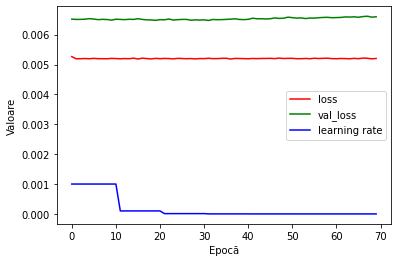

In [ ]:
plt.plot(history['loss'], color='red', label='loss')
plt.plot(history['val_loss'], color='green', label="val_loss")
plt.plot(history['lr'], color='blue', label="learning rate")

plt.xlabel('Epocă')
plt.ylabel('Valoare')
plt.legend(loc='best')
plt.savefig(path_landscapes + 'autoenc_skipTrue_conv2D_small.png')
plt.show()

Plot GAN on large landscapes

In [ ]:
path_landscapes = '/content/drive/My Drive/Licenta/landscapes/'
# path_landscapes = 'landscapes/'
path_archives = path_landscapes + 'dataset/big_dataset/all/'
# path_archives = 'archives/'
path_mr = path_landscapes + 'models+results/'
# path_cleancode = path_mr + 'cleancode/'
path_autoencoder = path_mr + 'autoencoder/'
path_gan = path_mr + 'gan/'
# print(path_gan)

In [ ]:
model_index_g = 13
train_number_g = '2'
path_architecture_g = path_models_results_gan(model_index_g)
path_models_g = path_architecture_g + 'models' + train_number_g + '/'
path_model_g = path_models_g + 'gener_ep4.h5'
path_results_g = path_architecture_g + 'results' + train_number_g + '/'
path_history_g = path_architecture_g + 'history' + train_number_g + '/' + 'history.npy'

In [ ]:
history=np.load(path_history_g, allow_pickle='TRUE').item()

In [ ]:
len(history['losses1_discr'])

56321

In [ ]:
plt.plot(history['losses1_discr'][0:-1:256], color='red', label='loss1_discr')
plt.plot(history['losses2_discr'][0:-1:256], color='green', label="loss2_discr")
plt.plot(history['losses3_gan'][0:-1:256], color='blue', label="loss_gan")

plt.xlabel('Epocă')
plt.ylabel('Valoare')
plt.legend(loc='best')
plt.savefig(path_portraits + 'gan13.png')
plt.show()

Plot GAN on small dataset

In [ ]:
path_landscapes = '/content/drive/My Drive/Licenta/landscapes/'
# path_landscapes = 'landscapes/'
path_archives = path_landscapes + 'dataset/big_dataset/all/'
# path_archives = 'archives/'
path_mr = path_landscapes + 'models+results/'
# path_cleancode = path_mr + 'cleancode/'
path_autoencoder = path_mr + 'autoencoder/'
path_gan = path_mr + 'gan/'
# print(path_gan)

In [ ]:
model_index_g = 13
train_number_g = '1'
path_architecture_g = path_models_results_gan(model_index_g)
path_models_g = path_architecture_g + 'models' + train_number_g + '/'
path_model_g = path_models_g + 'gener_ep3.0.h5'
path_results_g = path_architecture_g + 'results' + train_number_g + '/'
path_history_g = path_architecture_g + 'history' + train_number_g + '/' + 'history.npy'

In [ ]:
history=np.load(path_history_g, allow_pickle='TRUE').item()

In [ ]:
less_values_l3g = deepcopy(history['losses3_gan'])
less_values_l3g = less_values_l3g[200:]
print(less_values_l3g)

[1.8493689, 3.23559, 2.4661021, 1.4872961, 1.6074686, 2.075775, 1.9402657, 1.7634647, 1.6255207, 2.42028, 1.40795, 1.979438, 1.565078, 1.7650664, 1.7552968, 1.7189355, 2.2180252, 1.6643748, 1.3327708, 2.2652674, 1.7110357, 1.8586861, 2.5065002, 1.8360608, 2.689417, 2.6794958, 1.464683, 1.7503046, 1.8227079, 1.301833, 1.9067776, 2.3962836, 1.4963322, 1.5380229, 1.6308846, 2.6527128, 1.8802252, 1.5060971, 1.5597488, 1.3990293, 1.5925901, 1.645689, 1.4235218, 1.4739503, 1.4909203, 1.5915759, 2.0655403, 1.6569496, 1.5328298, 1.9282613, 1.4125725, 1.5237991, 2.0645065, 2.072773, 2.0932982, 1.7089586, 2.1251745, 1.871522, 1.5842745, 2.0419815, 1.8223895, 1.7659872, 1.7627766, 1.8122531, 1.6273237, 1.3951533, 1.4049927, 1.4374322, 1.6316593, 2.0066454, 1.4022965, 2.0948224, 1.7367358, 2.3756344, 1.8365593, 1.3405721, 1.7036084, 1.6316657, 1.5304618, 1.7631769, 1.4035672, 1.7636901, 1.560404, 1.3892223, 1.3522019, 1.4294814, 1.3804103, 1.5356979, 1.2992898, 1.2042778, 1.3345443, 1.8783644, 1.4

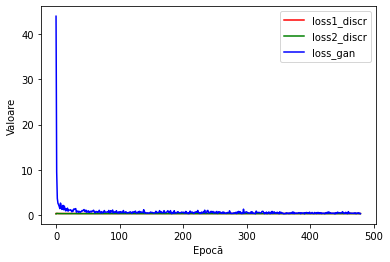

In [ ]:
plt.plot(history['losses1_discr'][0:-1:32], color='red', label='loss1_discr')
plt.plot(history['losses2_discr'][0:-1:32], color='green', label="loss2_discr")
plt.plot(history['losses3_gan'][0:-1:32], color='blue', label="loss_gan")

plt.xlabel('Epocă')
plt.ylabel('Valoare')
plt.legend(loc='best')
plt.savefig(path_landscapes + 'gan13small_bigger.png')
plt.show()

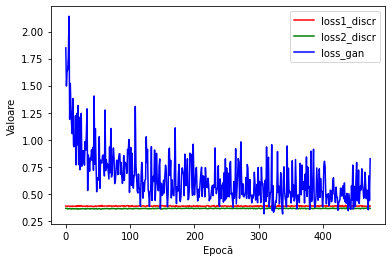

In [ ]:
plt.plot(history['losses1_discr'][200:-1:32], color='red', label='loss1_discr')
plt.plot(history['losses2_discr'][200:-1:32], color='green', label="loss2_discr")
plt.plot(less_values_l3g[0:-1:32], color='blue', label="loss_gan")

plt.xlabel('Epocă')
plt.ylabel('Valoare')
plt.legend(loc='best')
plt.savefig(path_landscapes + 'gan13small_smaller.png')
plt.show()

Predict on webcam photos

In [ ]:
path_portraits = '/content/drive/My Drive/Licenta/portraits_celeba/'
# path_portraits = ''
path_images = path_portraits + 'dataset/webcam/'
path_results = path_images + 'results1/'
# path_archives = 'archives/'
path_mr = path_portraits + 'models+results/'
path_cleancode = path_mr + 'cleancode/'
path_autoencoder = path_cleancode + 'autoencoder/'
path_gan = path_cleancode + 'gan/'

In [ ]:
x_test = []
for img in os.listdir(path_images + 'x_test/'):
  im = Image.open(path_images + 'x_test/' + img)
  im = im.resize((176, 216))
  x_test.append(np.array(im))

y_test = []
for img in os.listdir(path_images + 'y_test/'):
  im = Image.open(path_images + 'y_test/' + img)
  im = im.resize((176, 216))
  y_test.append(np.array(im))



In [ ]:
model_index_g = 13
train_number_g = '1'
path_architecture_g = path_models_results_gan(model_index_g)
path_models_g = path_architecture_g + 'models' + train_number_g + '/'
path_model_g = path_models_g + 'gener_ep11.0.h5'
path_results_g = path_architecture_g + 'results' + train_number_g + '_/'
# path_history_g = path_architecture_g + 'history' + train_number_g + '/' + 'history.npy'

In [ ]:
generator = load_model(path_model_g)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
for i in range(len(x_test)):
  x_test[i] = x_test[i] / 255
  y_test[i] = y_test[i] / 255

In [ ]:
x_test_copy = []
for i in range(len(x_test)):
  x_test_copy.append(np.expand_dims(x_test[i], axis=2))
  # print(x_test[i].shape)

In [ ]:
for i in range(len(x_test_copy)):
  print(x_test_copy[i].shape)

(216, 176, 1)
(216, 176, 1)
(216, 176, 1)
(216, 176, 1)
(216, 176, 1)
(216, 176, 1)
(216, 176, 1)
(216, 176, 1)
(216, 176, 1)


In [ ]:
x_test_copy2 = []
for i in range(len(x_test_copy)):
  x_test_copy2.append(np.array(x_test_copy))

In [ ]:
x_test = np.array(x_test_copy)
y_test = np.array(y_test)

In [ ]:
y_pred = generator.predict(np.array(x_test_copy))

In [ ]:
y_pred = y_pred * 255

for i, y in enumerate(y_pred):
    img = Image.fromarray(y.astype(np.uint8))
    img.save(path_results + '{}.jpg'.format(i))